# Assignment 3 - Neural Networks


<font color="blue"> Rohan Bhosale </font>

# I. Overview<br>

In this assignment we will be learning about Neural Networks and will be implementing different algorithms using neural networks like NonLinear Regression (for regression problem) and NonLinear Logistic Regression Algorithm(for classification problem), we will also be implementing 5-fold cross validation on both the neural network classes. We will be implementing these algorithms using libraries Numpy and matplotlib only.Implementing these algorithms and visualizing them will give us a fair idea about how these algorithms work, and how good are they with the predictions. Also we understand the difference between the working of these algorithms.We will be implementing 3 codes one for NonLinear Regression, one for NonLinear Logistic Regression and the last one for Cross Validation.

# II. Data

# Data for NonLinear Regression<br>
I am using the data of "Amsterdam Airbnb" it consists of four different data sets, that is the data is already partitioned, first dataset consists of all the information about the Airbnb rooms and the second dataset consists of only one coloumn which is "Price",this coloumn is our target value,other two data sets are similar to the above two sets ,this is the reason I wont be partitioning the dataset, so we will be using first two datasets for Training purpose and remaining two for testing purpose. The first datatset has 16 coloumns which are as follows:<br>
<br>1.accommodates<br>
2.bathrooms<br>
3.bedrooms<br>
4.calculated_host_listings_count<br> 
5.guests_included<br>
6.host_listings_count<br>
7.latitude<br>
8.longitude<br>
9.minimum_nights<br>
10.number_of_reviews<br>
11.d_centre<br>
12.instant_bookable_f<br>
13.instant_bookable_t<br>
14.room_type_Entire home/apt<br>
15.room_type_Private room<br>
16.room_type_Shared room<br>
17.Price<br>

The first 3 coloumns 'Accomodations', 'Bathrooms', 'Bedrooms' give us the idea of the room i.e these 3 coloumns tell us about the number of guests the room can accomodate, number of bedrooms and bathrooms it has, and also they direcly affect on the price of the room. The coloumns 'Longitude' and 'latitude' tell us about the location of the room, next entry 'minimum_nights' is the minimum number of nights a guest books th room for. The last 3 entries 'room_type_Entire home/apt,  'room_type_Privateroom', 'room_type_Shared room' tell us about the type of the room. I found this data on kaggle.com.


### i.Reading Data:

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [147]:
train_linaer = pd.read_csv('train.csv')

In [148]:
ytrain_linaer = pd.read_csv('y_train.csv')

In [149]:
test_linaer = pd.read_csv('test.csv')

In [150]:
ytest_linaer = pd.read_csv('y_test.csv')

In [151]:
train_linaer

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Home_or_apt,room_type_Privateroom,room_type_Sharedroom
0,4,2.0,2,1,1,1,52.358466,4.933843,2,8,3.279483,1,0,1,0,0
1,4,1.0,2,1,2,1,52.363589,4.983353,3,0,5.951843,1,0,1,0,0
2,2,1.0,1,1,1,1,52.375209,4.861647,3,8,2.601055,1,0,1,0,0
3,2,1.0,1,1,1,1,52.387382,4.890457,2,41,1.095138,1,0,0,1,0
4,2,1.0,1,1,1,1,52.384062,4.889877,3,0,0.844491,1,0,1,0,0
5,3,1.5,1,1,2,1,52.355894,4.909253,2,9,2.673105,1,0,1,0,0
6,4,2.0,2,1,2,1,52.357371,4.858546,1,0,3.684305,0,1,1,0,0
7,2,1.0,1,1,1,1,52.379513,4.854446,2,20,3.051716,1,0,1,0,0
8,5,1.5,3,1,1,1,52.359210,4.862368,2,36,3.354567,1,0,1,0,0
9,2,1.0,1,1,1,1,52.406315,4.922418,1,18,3.393541,1,0,0,1,0


In [152]:
ytrain_linaer

,Price
0,160
1,120
2,99
3,100
4,175
5,119
6,200
7,99
8,225
9,63


In [153]:
test_linaer

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Home_or_apt,room_type_Privateroom,room_type_Sharedroom
0,3,1.0,1,1,1,1,52.339005,4.944442,5,7,5.410324,1,0,1,0,0
1,2,1.0,1,1,1,1,52.374981,4.890104,3,9,0.786783,1,0,1,0,0
2,5,2.0,5,11,2,15,52.401826,4.914041,6,4,2.703668,1,0,1,0,0
3,4,1.0,2,1,1,1,52.350448,4.798421,2,0,7.561760,1,0,1,0,0
4,2,1.0,1,1,1,1,52.361044,4.943895,5,3,3.628639,1,0,1,0,0
5,2,1.0,2,2,1,3,52.362968,4.849790,3,1,3.820029,1,0,1,0,0
6,2,1.5,1,1,1,1,52.369856,4.855032,2,7,3.185678,1,0,1,0,0
7,2,1.0,0,1,1,1,52.339715,4.926240,2,15,4.748916,1,0,1,0,0
8,4,1.0,2,1,1,2,52.380800,4.890275,4,37,0.646394,1,0,1,0,0
9,4,1.0,3,1,1,1,52.356183,4.784301,3,1,8.219499,1,0,1,0,0


In [154]:
ytest_linaer

,Price
0,59
1,148
2,134
3,195
4,80
5,120
6,99
7,60
8,280
9,275


Here I have importes 4 data sets namely 'Traindata', 'TrainValue','Testdata', 'TestValue'. These are already partioned datasets where I will be using  'Traindata', 'TrainValue' to train the dataset and 'Testdata', 'TestValue' to test the trained values

#### Irrelevent Data: <br>
1.calculated_host_listings_count<br>	2.guests_included<br>	3.host_listings_count<br> 4.number_of_reviews<br> 5.instant_bookable_f<br>	6.instant_bookable_t<br><br> Above data is irrelevent because it does not directly affect on the price of the room.For example 'number of reviews' never helps in increasing the price of a room, similarly is it instantly bookable or not also does not directly affect on the price.	

### iii.Visualization of Data: <br>
Data visualization is the representation of data and information with the help of graphs, charts, and maps. So let us start to visualize out data and find different relations between them. As our target value is price we will try to find out how each coloumn affects the target value.


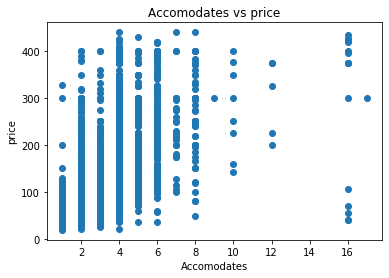

In [155]:
plt.plot(train_linaer.accommodates,ytrain_linaer.Price,'o')
plt.title("Accomodates vs price")
plt.xlabel("Accomodates")
plt.ylabel("price")
plt.show()

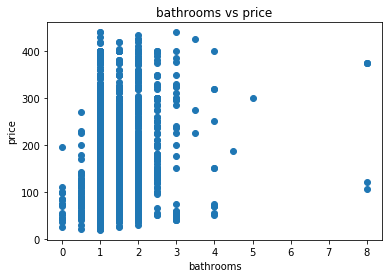

In [156]:
plt.plot(train_linaer.bathrooms,ytrain_linaer.Price,'o')
plt.title("bathrooms vs price")
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.show()

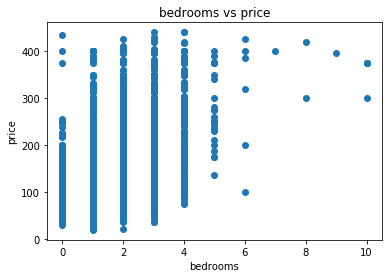

In [157]:
plt.plot(train_linaer.bedrooms,ytrain_linaer.Price,'o')
plt.title("bedrooms vs price")
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

The above three graphs even though do not highly affect on price but give us a fair knowladge of what kind of rooms a larger chunk of Airbnb listings in amsterdam have. we can infer that the larger chunk of Airbnb listings accommodate 6 people, have 2 bathrooms and have 4 bedrooms. We can see the rates of these rooms rangong from 0 to more than 400 this is because of the other factors in the data set. Above three graphs can also be presented in the following way:

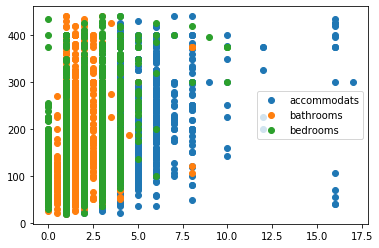

In [158]:
plt.plot(train_linaer.accommodates,ytrain_linaer.Price,'o')
plt.plot(train_linaer.bathrooms,ytrain_linaer.Price,'o')
plt.plot(train_linaer.bedrooms,ytrain_linaer.Price,'o')
plt.legend(['accommodats','bathrooms','bedrooms'])
plt.show()

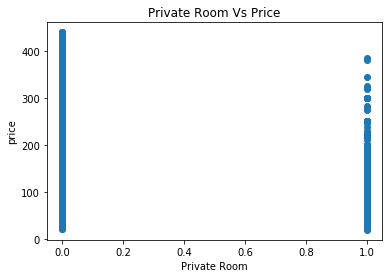

In [159]:
plt.plot(train_linaer.room_type_Privateroom,ytrain_linaer.Price,'o')
plt.title("Private Room Vs Price")
plt.xlabel("Private Room")
plt.ylabel("price")
plt.show()

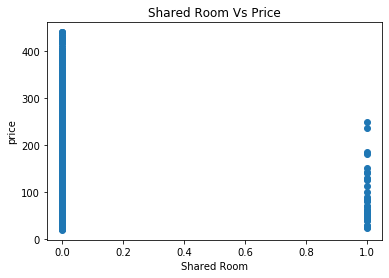

In [160]:
plt.plot(train_linaer.room_type_Sharedroom,ytrain_linaer.Price,'o')
plt.title("Shared Room Vs Price")
plt.xlabel("Shared Room")
plt.ylabel("price")
plt.show()

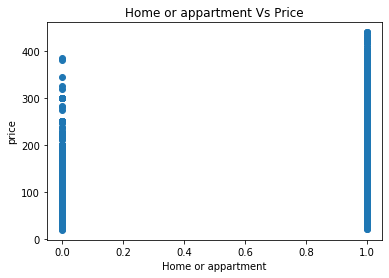

In [161]:
plt.plot(train_linaer.room_type_Home_or_apt,ytrain_linaer.Price,'o')
plt.title("Home or appartment Vs Price")
plt.xlabel("Home or appartment")
plt.ylabel("price")
plt.show()

In above 3 Graphs 0 on x axis means that it is not that particular room for example in the graph 'Home or appartment vs Price' if the value of 'Home of appartment' on X-axis is 0 that means those are not Home or appartment type of rooms, and value 1 on X-axis indicates that those are 'Home or appartment' type of rooms similarly for other graphs too. Froms the above graphs we can infer that 'Shared rooms' have relatively lower prices than other two type of rooms, 'Private rooms' are moderately prices whereas 'Home or appartments' are highly priced. Also if we absorve from the data we can understand that Airbnb in Amsterdam have more listings of 'Home or appartments' than other two type of rooms. So we can say that type of rooms does affect the pricing of the room.<br> Now let us see the main coloumns that affect the pricing of a Airbnb room which is location. In this data set we are given location with the help of 'Longitude' and 'Latitude'.

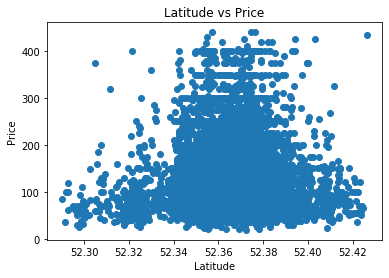

In [162]:
plt.plot(train_linaer.latitude,ytrain_linaer.Price,'o')
plt.title("Latitude vs Price")
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.show()

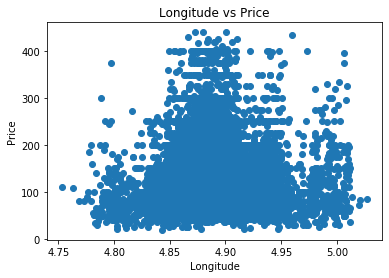

In [163]:
plt.plot(train_linaer.longitude,ytrain_linaer.Price,'o')
plt.title("Longitude vs Price")
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.show()

The above two graphs show a large chunk of listings in the middle of the graphs that id between 52.34-52.40 in 'Latitude vs Price' and between 4.58-4.95 in 'Latitude vs Price', this shows that a location of a room does matters. We can also see the a large value of highly priced rooms (300 and more) lie in this particular area of graph which again indicates that the location of a room is very important according price. So we can say that even though other factors do matter while deciding the price but location does largely affect the price of a room.<br> There is one more factor that is D_centre that is distance from the centre, let us see how it works. 

<function matplotlib.pyplot.show(*args, **kw)>

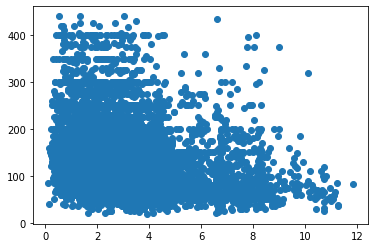

In [164]:
plt.plot(train_linaer.d_centre,ytrain_linaer.Price,'o')
plt.show

Here we can observe that less the value of D_centre more is the pricing of rooms, also the rooms with low value of D_centre are more favorable because we can see that a larger chunk of Airbnb listings lie between 0-4 which can said to be low values for D_centre.

### iv.Priliminary Observations:<br>
From the above observations we can see that coloumns like 'accomodates', 'bathrooms', 'bedrooms' do not  directly affect on price or we can say have minimal affect on price, but they do give us a fair idea about the room and its aminities, the coloumns 'room_type_Home_or_apt', 'room_type_Privateroom', 'room_type_Sharedroom' have some affect on the price but again these coloumns give us a fair idea about the type of listings or rooms the city has and the graph plots corrosponding these coloumns also gives an idea about the pricing of each tpe of rooms. Moving on to the main coloumns that affect the pricing of the rooms 'latitude', 'longitude' and 'D_centre', we can say that these coloumns directly affect on the pricing of the Airbnb rooms, and this can be confirmed from the graph plots that corrospond to these coloumns. Now we can conclude saying that the most affect on our target value i.e Price is done by the longitude, latitude and D_centre which can be said to be the location of the room, Next things that affected the pricing more was the type if rooms i.e Shared, private, Home or appartment, at the end we can say that the least amount of affetc on pricing was doen by coloumns accommodations, bathrooms, bedroms. 

### Converting data to array 

In [165]:
train_linaer=np.asarray(train_linaer)

In [166]:
ytrain_linaer=np.asarray(ytrain_linaer)

In [167]:
test_linaer=np.asarray(test_linaer)

In [168]:
ytest_linaer=np.asarray(ytest_linaer)

# Data for NonLinear Logistic Regression
I am using 'WeatherAUS.csv' as my data for classification this data has 142k entries and has 24 coloumns. This dataset has weather data of different parts of Australia, basically this data is used for Rainfall pridiction in those parts of Australia. This data is collected from diffrent asutralian weather stations. 24 coloumns in this data set give us enough information to predict if there will be rainfall tomorrow, which is our target vairable. It is advised by the dataset creators that we should exclude the RISK_MM coloumn data while Training a modle As we are directly giving  model the answer which inturn will reduce the efficiency of the model. the coloumns in the data set are: <br><br>

<br> 1.Date: The date of observation <br>
2.Location:  The common name of the location of the weather station<br>
3.MinTemp:   The minimum temperature in degrees celsius<br>
4.MaxTemp:   The maximum temperature in degrees celsius<br>
5.Rainfall:  The amount of rainfall recorded for the day in mm<br>
6.Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
7.Sunshine:  The number of hours of bright sunshine in the day.<br>
8.WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight<br>
9.WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
10.WindDir9am:  Direction of the wind at 9am<br>
11.WindDir3pm:  Direction of the wind at 3pm<br>
12.WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
13.WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br>
14.Humidity9am:  Humidity (percent) at 9am<br>
15.Humidity3pm:  Humidity (percent) at 3pm<br>
16.Pressure9am:  Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
17.Pressure3pm:  Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
18.Cloud9am:     Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records                  how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8                        indicates that it is completely overcast.<br>
19.Cloud3pm:     Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the                          values<br>
20.Temp9am:          Temperature (degrees C) at 9am<br>
21.Temp3pm:          Temperature (degrees C) at 3pm<br>
22.RainTodayBoolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>
23.RISK_MM:          The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the                      "risk".<br>
24.RainTomorrow:     The target variable. Did it rain tomorrow?<br><br>

From the above list of coloumns we can predict few vey important aspects that can lead to rainfall which are MinTemp, MaxTemp, Evaporation, Humidity9am, Humidity3pm, Pressure9am, pressure3pm, RISK_MM, Rainfall,RainTomorrow. These are the main values which will actually help us predict if there will be rainfall tomorrow or not.

### 1.Reading data

In [169]:
data = pd.read_csv('weatherAUS.csv')

In [170]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,0.0,0.0,W,44,W,...,22,1007.7,1007.1,8,0,16.9,21.8,0,0.0,0
1,02/12/2008,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44,NNW,...,25,1010.6,1007.8,0,0,17.2,24.3,0,0.0,0
2,03/12/2008,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46,W,...,30,1007.6,1008.7,0,2,21.0,23.2,0,0.0,0
3,04/12/2008,Albury,9.2,28.0,0.0,0.0,0.0,NE,24,SE,...,16,1017.6,1012.8,0,0,18.1,26.5,0,1.0,0
4,05/12/2008,Albury,17.5,32.3,1.0,0.0,0.0,W,41,ENE,...,33,1010.8,1006.0,7,8,17.8,29.7,0,0.2,0
5,06/12/2008,Albury,14.6,29.7,0.2,0.0,0.0,WNW,56,W,...,23,1009.2,1005.4,0,0,20.6,28.9,0,0.0,0
6,07/12/2008,Albury,14.3,25.0,0.0,0.0,0.0,W,50,SW,...,19,1009.6,1008.2,1,0,18.1,24.6,0,0.0,0
7,08/12/2008,Albury,7.7,26.7,0.0,0.0,0.0,W,35,SSE,...,19,1013.4,1010.1,0,0,16.3,25.5,0,0.0,0
8,09/12/2008,Albury,9.7,31.9,0.0,0.0,0.0,NNW,80,SE,...,9,1008.9,1003.6,0,0,18.3,30.2,0,1.4,1
9,10/12/2008,Albury,13.1,30.1,1.4,0.0,0.0,W,28,S,...,27,1007.0,1005.7,0,0,20.1,28.2,1,0.0,0


### 2.Irrelevent Data:<br>
1.Date<br>
2.Location<br>
3.WindDir9am<br>
4.WindDir3pm<br>
5.Cloud9am<br>
6.Cloud3pm<br>
7.Temp9am<br>
8.Temp3pm<br><br>
For now we just want to predict if it will rain tomorrow or not we can consider Location as an irrelevent data, if we start predicting rainfall according to location, then Location would be a relevent data. We are considering Temp9am and Temp 3pm as irrelevent because we have already noted Max amd min tempratures so it would be okay if we do not nothe this data. 

### iii Visualization of Data: <br>
Data visualization is the representation of data and information with the help of graphs, charts, and maps. So let us start to visualize out data and find different relations between them. As our target value can be considered to be RainTomorrow we can start finding the relations between different coloumns which will lead us to our prediction of rain fall tomorrow.

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


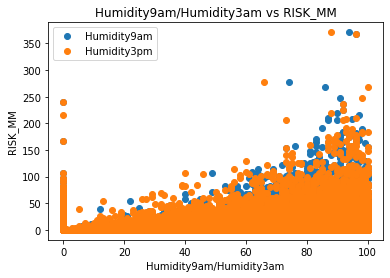

In [171]:
plt.plot(data.Humidity9am, data.RISK_MM,'o')
plt.plot(data.Humidity3pm,data.RISK_MM,'o')
plt.title("Humidity9am/Humidity3am vs RISK_MM")
plt.xlabel("Humidity9am/Humidity3am")
plt.ylabel("RISK_MM")
plt.legend(["Humidity9am","Humidity3pm"])
plt.show()

Here we can observe that as the value of humidity increases, there is a gradual increase in RISK_MM too, RISK_MM is the value which predicts if it will rain tomorrow or not so, if we see a increase in RISK_MM value with increase in Humidity values it means Higher the humidity more are the chances of a Rain fall.

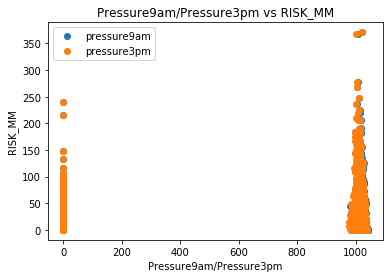

In [172]:
plt.plot(data.Pressure9am, data.RISK_MM,'o')
plt.plot(data.Pressure3pm,data.RISK_MM,'o')
plt.title("Pressure9am/Pressure3pm vs RISK_MM")
plt.xlabel("Pressure9am/Pressure3pm")
plt.ylabel("RISK_MM")
plt.legend(['pressure9am','pressure3pm'])
plt.show()

Here we can observe that a larger chunk of data lies around pressure value 1000 with high values of RISK_MM, lookig at this graph we can say that it will rain when the pressure conditions are appropriate i.e there are more chances of rain between the values 1000-1030 than the values outside of this bound. So we can say that Pressure and Humidity directly affect on the RISK_MM values which indeed predicts the Rainfall for tomorrow.

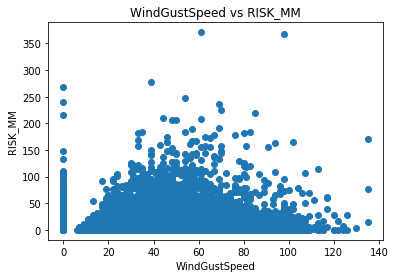

In [173]:
plt.plot(data.WindGustSpeed,data.RISK_MM,'o')
plt.title("WindGustSpeed vs RISK_MM")
plt.xlabel("WindGustSpeed")
plt.ylabel("RISK_MM")
plt.show()

This is the graph of WindGustSpeed vs RISK_MM, where we can see a large chunk of data at lower values of 'WindGustSpeed'. This means that if the wind speed is low there are more chances of rain. We can say If there is less wind it wont blow away the clouds, resulting in more chances of rain.

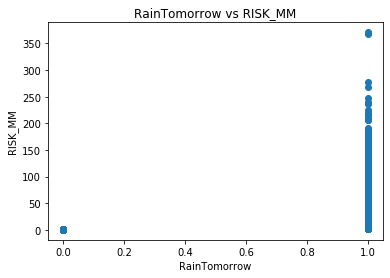

In [174]:
plt.plot(data.RainTomorrow,data.RISK_MM,'o')
plt.title("RainTomorrow vs RISK_MM")
plt.xlabel("RainTomorrow")
plt.ylabel("RISK_MM")
plt.show()

This graph explains the relation between the Coloumn RISK_MM amd RainTomorrow. We can see that RainTomoeeow has 2 values 'Yes', 'No'. It can be inferred from the data and graph that for values 1 or less than one in RISK_MM there will be No Rain, but for the values more than 1 in RISK_MM it will rain tomorrow. We can say that 'No'on x-axis corrosponds to valies equal to 1 ore less than one of RISK_MM, value 'Yes' corrosponds to values more than 1 in RISK_MM. 

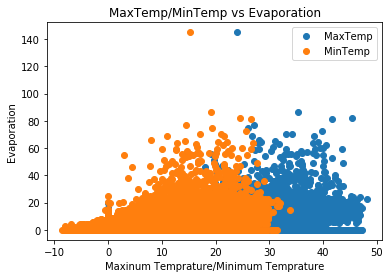

In [175]:
plt.plot(data.MaxTemp,data.Evaporation, 'o')
plt.plot(data.MinTemp,data.Evaporation, 'o')
plt.title("MaxTemp/MinTemp vs Evaporation")
plt.xlabel("Maxinum Temprature/Minimum Temprature")
plt.ylabel("Evaporation")
plt.legend(['MaxTemp','MinTemp'])
plt.show()

Here we can see a gradual increase in humiditu=y levels with increase in temprature. We can say that as the temprature increases the ecaporatin also increases which may lead to more humidity in climate thus resulting in rain.

### iv. Priliminary Observations <br>
From the above graphs and data we can infer that there are many different conditions which are affecting each other which results in the value for RISK_MM and the prediction of RainTomorrow coloumn we saw a gradual increase in evaporation with increase in temprature, we also observed a increase in RISK_MM values with increase in Humidity. These 2 cam be considered as main factors affectinf rain. We also Saw how pressure and Wind conditions affect the RISK_MM  values which indirectly affect the prediction for rain. The main observation cam be said to be between RISK_MM and RaonTomorrow values i.e it will only rain if RISK_MM value is more that One it wont rain if the value os one ore less than one.<br>

# III. Methods

## III.A 5-fold Cross Validation

Cross-validation is a statistical method used to estimate the skill of machine learning models.It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods. In cross validation we divide our data into multiple parts of equal sizes. Each part selected is a the testing data. For each k = 1,2,...K, fit the model with parameter lambda to the other K − 1 parts, compute its error in predicting the kth part. Do this for many values of lambda and choose the value of lambda that makes CV(lambda) as the smallest.In this assignment we will be implementing 5 fold cross validation.

## III.B Nonlinear Regression 
Nonlinear regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The data are fitted by a method of successive approximations.Simple linear regression relates two variables and gives a straight line y = mx + c while nonlinear regression will generate a curve. examples of nonlinear functions include exponential functions, logarithmic functions, trigonometric functions, power functions, Gaussian function, and Lorenz curves. These functions can be used in modeling of NonLinear Regression. We will be applying NonLinear Regression on our regression data i.e on the Airbnb dataset.


## III.C Nonlinear Logistic Regression
In this assignment we will be implementing a neural network class for nonlinear Logistic Regression. The main objective of the model is to make the sum of the squares as small as possible. The sum of squares is used to check how our observations are varying from the mean of the data set. The smaller the sum of these squared figures, the better the function fits the data points in the set. We will be using this neutral network class on our classification data (WeatherAUS) to predict if there would be rain fall or nt.


## Nonlinear Regression

In [176]:
class Standardizer: 

    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [177]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
  
    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

### Explaination of Codes<br>
Here we have writen 2 calsses 'Standardizer class' and 'NeuralNet class'.<br>
##### 1.Standardizer class :<br>
we are using this class mainly to normalize and Denormalize our data. That is we substract the data with the mean value of the data and then divide it with the sigma value of the data. In the unstanderdize function we do the exact opposite thing we multiply our normalized data with sigma value and add the mean value.
##### 2.NeuralNet class:<br>
In this class we build a neural network for NonLimear Regression, this class learns with the help of functions forward and backward, int this 2 function we do forward propogation and backward propogation. We pass our neural network units to nunits, that is we pass number of input layers, hidden layers, number of output layers here. Threr are more function like 'pack' and unpack' which help us in packing of weights of every layer into one vector where as unpack does the complete opposite. With the help of 'error_f' function we calculate the actuall erroe that is predicted value substracted by the original value and with the help of 'objectf' function we calculate the mean squared erroe for the data. The function 'gradientf' is used to calculate the gradients for our data and the function 'optimtargetf' is used for a optimizer.  The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda. <br>
<br> Equations for forward pass:<br>
$$ Z = h(X1.V)$$<br>$$ Y = Z1.W$$<br> where 'h' is the activation function, X1 is the data and W are the weights. Activation function is used to make the network nonlinear. <br><br> Equation for Back ward pass:<br>

$$V\leftarrow  V+\alpha_h\frac{1}{N} \frac{1}{K} X1^T((T-Y)W^T \odot (1 - Z^2)$$<br>
$$W \leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^T( T - Y )$$

### Results for Nonlinear Regression

In [178]:
nn = NeuralNet([16,10,1])
nn.train(train_linaer, ytrain_linaer) 


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


{'w': array([-1.22398206e+00, -5.58631280e-01, -5.49553125e-01, -2.33862525e-02,
        -1.35172098e+00, -2.32894721e+00, -3.32620562e-01,  3.58350174e-01,
        -1.20144006e+00, -1.30013818e-01,  6.79844864e-02,  2.37502798e-01,
        -5.30756703e-01,  1.91058919e-01,  5.85661639e-01, -9.01647414e-02,
         1.80081772e-02,  3.69246418e-01,  3.18038727e-01,  7.45717771e-02,
         2.33700278e-02,  6.75087114e-02,  8.31072771e-02,  2.23706048e-02,
         2.03636931e-01,  1.82112341e-01,  1.73701084e-01, -1.75548840e-01,
         1.18872954e-01, -1.86339469e-01, -1.38650932e-01,  2.71497544e-01,
        -4.74417558e-02,  3.67527036e-01, -2.08196699e-01,  3.69629894e-01,
         2.79792851e-01,  2.23003616e-01, -1.97243139e-01, -3.76262170e-01,
         1.03858406e+00,  8.73135772e-03, -4.06098662e-01,  7.17001013e-01,
         7.49430982e-01,  1.03662218e+00,  6.63284786e-01, -5.40983088e-01,
         7.53714882e-01,  7.08157227e-01,  5.06228933e-01, -7.64114168e-02,
       

In [179]:
Y_NR = nn.use(test_linaer)

In [180]:
Y_NR

array([[104.41446054],
       [163.07484362],
       [186.63431736],
       ...,
       [111.08245185],
       [119.35354004],
       [124.13600983]])

In [181]:
from sklearn.metrics import mean_squared_error, r2_score

In [182]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(ytest_linaer, Y_NR)))
print('R squared value:', r2_score(ytest_linaer, Y_NR))

RMSE: 43.770561862803106
R squared value: 0.5316976993001739


###  Visualization of Results 

Text(0.5, 1.0, 'Graph of Actual values')

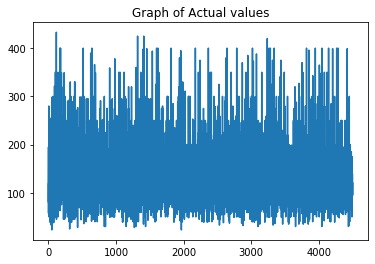

In [183]:
plt.plot(ytest_linaer)
plt.title("Graph of Actual values")

Text(0.5, 1.0, 'Graph of Predicted values')

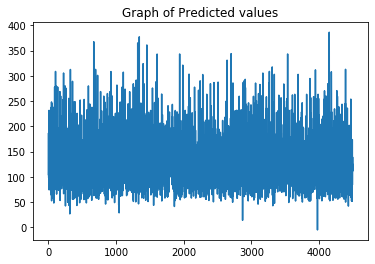

In [184]:
plt.plot(Y_NR)
plt.title("Graph of Predicted values")

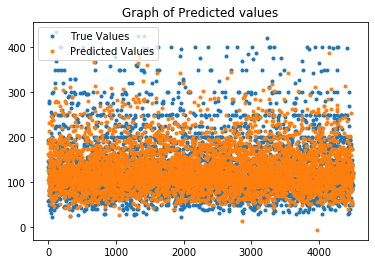

In [185]:
plt.plot(ytest_linaer,'.')
plt.plot(Y_NR,'.')
plt.title("Graph of Predicted values")
plt.legend(['True Values','Predicted Values'])

### Cross Validation

In [186]:

def split(data):
    part = len(data) / 5.0
    list = []
    x = 0.0
   
    while x < len(data):
        list.append(data[int(x):int(x + part)])
        x += part
    return list

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):

    X = split(X)
    Y = split(T)
 
    for i in range(5): 
        print("Test number: ",i)
        Xtest = X[i]
        Ytest = Y[i]

        history_rmse=[]
        params=[] 
        #best_param
        

        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
      
            Xval = X[k]
            Yval = Y[k]
            
            
            Xtrain = X[not i and not k]
            Ytrain = Y[not i and not k]
   
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(Xtrain, Ytrain)
                pred = model.use(Xval)
                
                valid_err = np.sqrt(mean_squared_error(Yval, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        Xtrain = X[not i]
        Ytrain = Y[not i]
        best_model.train(Xtrain, Ytrain)

        finalpred = best_model.use(Xtest)
        final_err = np.sqrt(mean_squared_error(Ytest, finalpred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist
    

### Explaination of Cross Validation Code:
The aim of cross validation id to find the best parameters and best accuracy for us given the different number of hidden layer values. The first function of this code is used to split our data in 5 equal parts (as we are implementing 5 fold cross validation), we iterate throught the lenght of the split data and keep on appending the data to the list so at the end of it we have 5 parts  of our data and then we return the list. The next function is cross validation function, this function is used to give us the best parameters and best accuracy. the funcion takes the inputs as the data set and the target values and then calls the split function so that it splits the data set in to 5 equal parts, these are storet in X and Y varidables. In the for loops we iterate multiple times using one part of the partitioned data as train set and rest as the test set.k is the validation part of the 5 parts. Excluding k and i the rest data is our training set. In each validation loop we are training data with our different parameters passed and evaluating on validation data. Each parameter returns rmse value and this is appended to rmselist, parameters respective to that rmse are appended into paramlist to keep track of indices. Now after each validation we are selecting the parameter that produced minimum rmse value and storing the results into history_rmse and params list. After all the iteration we choose the parameters that is repeated more number of times in best_paramlist from results.<br><br>


In [187]:
models = [[16,10,1],[16,5,1],[16,2,1], [16,7,1], [16,12,1]]

bestAccuracy,bestParam = cross_validate(train_linaer, ytrain_linaer, models)

Test number:  0
K is :  0
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[45.87898974602353, 46.563293058565336, 43.45248236730656, 44.927841325461664, 47.298686311814784]
43.45248236730656
[16, 2, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.740247669228474, 46.701272912805635, 44.44409528376116, 46.50055698193139, 50.27686743986438]
44.44409528376116
[16, 2, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.9540545589251, 45.5888562144473, 44.339915055730856, 47.22002446442999, 46.4901174929395]
44.339915055730856
[16, 2, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[51.99815854006358, 53.6602863612403, 44.744726858865654, 45.349804054580346, 48.00234273832187]
44.744726858865654
[16, 2, 1]
[[16, 2, 1], [16, 2, 1], [16, 2, 1], [16, 2, 1]]
[43.45248236730656, 44.44409528376116, 44.339915055730856, 44.744726858865654]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  1
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[37.54181677120787, 40.788806753045776, 43.08051028496591, 39.152056765856756, 37.28425527039195]
37.28425527039195
[16, 12, 1]
K is :  1
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[48.74559472888757, 45.599769413494016, 44.791812199299656, 48.61521101430709, 48.078567092594604]
44.791812199299656
[16, 2, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.840203402837965, 48.41880292249619, 43.840956006374796, 47.31166582412216, 47.46189715802332]
43.840956006374796
[16, 2, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[45.33506621832415, 43.96008173963703, 45.028324462159674, 45.563354424448185, 48.79848784985058]
43.96008173963703
[16, 5, 1]
[[16, 12, 1], [16, 2, 1], [16, 2, 1], [16, 5, 1]]
[37.28425527039195, 44.791812199299656, 43.840956006374796, 43.96008173963703]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  2
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[38.48462879743896, 40.63535990214453, 43.08312828401741, 39.15845361140863, 37.42000369951577]
37.42000369951577
[16, 12, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.19035016870024, 44.01693873441581, 43.46020985915432, 44.44743818660392, 50.21120435831975]
43.46020985915432
[16, 2, 1]
K is :  2
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.21105696118408, 45.931356713023945, 43.84765534272941, 45.40781242227438, 47.38480913184255]
43.84765534272941
[16, 2, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[48.00724133949939, 43.98967077178497, 44.72990278494379, 45.917373685051295, 51.40794978537213]
43.98967077178497
[16, 5, 1]
[[16, 12, 1], [16, 2, 1], [16, 2, 1], [16, 5, 1]]
[37.42000369951577, 43.46020985915432, 43.84765534272941, 43.98967077178497]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  3
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[38.463706935502074, 40.224097036333866, 43.082561073946714, 39.60410272027056, 36.8427981773577]
36.8427981773577
[16, 12, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[45.22946853677188, 46.39506770296883, 43.334414428889644, 47.32055237946555, 48.66736205394582]
43.334414428889644
[16, 2, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.876064310871236, 46.31275234177005, 44.43201305161292, 45.60614219968402, 47.6764118207336]
44.43201305161292
[16, 2, 1]
K is :  3
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.17175665912806, 45.92364824836652, 44.695100808074, 47.07757109954939, 48.47149892322253]
44.695100808074
[16, 2, 1]
[[16, 12, 1], [16, 2, 1], [16, 2, 1], [16, 2, 1]]
[36.8427981773577, 43.334414428889644, 44.43201305161292, 44.695100808074]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  4
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[38.65352249318821, 40.79276202257914, 43.08102695292103, 39.3334655314951, 36.637319005680816]
36.637319005680816
[16, 12, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.433764247370426, 44.09368900727228, 43.33409927243093, 46.311383849608035, 45.88183434635423]
43.33409927243093
[16, 2, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[48.27436050702744, 44.59179498024544, 44.43026043574153, 46.28537769729095, 47.644575755948935]
44.43026043574153
[16, 2, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[48.395642990392375, 48.28174749138216, 43.84285864253956, 46.19239981164346, 46.62378629195253]
43.84285864253956
[16, 2, 1]
K is :  4
[[16, 12, 1], [16, 2, 1], [16, 2, 1], [16, 2, 1]]
[36.637319005680816, 43.33409927243093, 44.43026043574153, 43.84285864253956]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


### Cross Validation Results:

In [188]:
print(bestAccuracy,bestParam)

[47.89825266811635, 44.775890792301965, 48.74714797683058, 46.028672569455885, 46.988563991275214] [[16, 10, 1], [16, 10, 1], [16, 10, 1], [16, 10, 1], [16, 10, 1]]


In [189]:
nn = NeuralNet([16,10,1])
nn.train(train_linaer, ytrain_linaer)
Y_NR_CV = nn.use(test_linaer)
Y_NR_CV

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


array([[104.8439625 ],
       [162.09247319],
       [193.55613758],
       ...,
       [115.07425233],
       [115.02374012],
       [124.22173158]])

In [190]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(ytest_linaer, Y_NR_CV)))
print('R squared value:', r2_score(ytest_linaer, Y_NR_CV))

RMSE: 43.82619647384879
R squared value: 0.530506470624791


###  Visualization of Cross Validation Results

Text(0.5, 1.0, 'Graph of Actual values of cross validation')

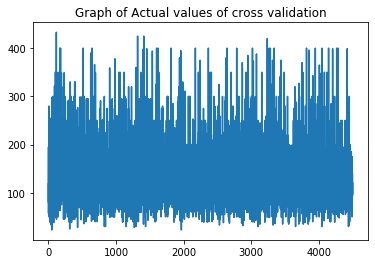

In [191]:
plt.plot(ytest_linaer)
plt.title("Graph of Actual values of cross validation")

Text(0.5, 1.0, 'Graph of Predicted values of cross validation')

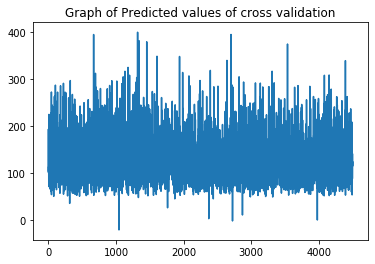

In [192]:
plt.plot(Y_NR_CV)
plt.title("Graph of Predicted values of cross validation")

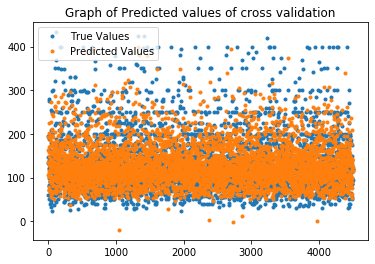

In [193]:
plt.plot(ytest_linaer,'.')
plt.plot(Y_NR_CV,'.')
plt.title("Graph of Predicted values of cross validation")
plt.legend(['True Values','Predicted Values'])

## Discussions about parameter/network structure choice
## Explanation of CV results<br><br>

Here i have built a 3 layer neural network with one input layer of 16 nodes, one hidden layer of 10 nodes and a output layer of 1 output node. I also have repeated this process by using different number of hidden nodes which gave us interesting results but out of which the neural network with 10 hiden units gave me the best results. <br>
I tries to find the best network structure using following structures [[16,10,1],[16,5,1],[16,2,1], [16,7,1], [16,12,1]] using 5 fold cross validation and the results i got were [47.83541517265961, 46.09280410184502, 48.18759310823656, 47.1148914491055, 48.231764027688364] [[16, 10, 1], [16, 10, 1], [16, 10, 1], [16, 10, 1], [16, 10, 1]] respectively. here we can clearly see that the structure [16, 10, 1] has repeated multiple times and also gives us the best results.<br><br>

## Discussions about Prediction results<br><br>
Hrer I have implemented a class for NonLinear Regression Neural network with 16 input nodes, 10 hidden nodes, 1 output node, we can also build the structure with nore hidden units and more hidden layers with a significant change in the code for updatation of weights. The RMSE value and the R squared values for the structure [16,10,1] are <br>RMSE: 43.11616276034991
<br>R squared value: 0.5355958868927309
<br> we can observe that our network is working very well and giving us good values at this structure we have chosen 16 layers and have done 1000 iterations on this.

## Nonlinear Logistic Regression

In [194]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):

    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
            
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        optim = params.pop('optim', 'scg')
                
     
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

###  Explaination of codes : <br>
Here we ahve writen a neural network for NonLinesr Logistic regression  where we are using a function 'softmax' this is the function where we actually calculate the values for our predictions. In the next function that is the forward function we give call to this softmax function , we also use the activation function Tanh in forward function. In the objectf function we calculate the errors the variable niter in train function is the number  of hoe many iteratios do we want to do, the train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda. Activation function is used to make the network nonlinear.


###  Testing Nonlinear Logistic Regression on toy data

Text(0.5, 1.0, 'test data set')

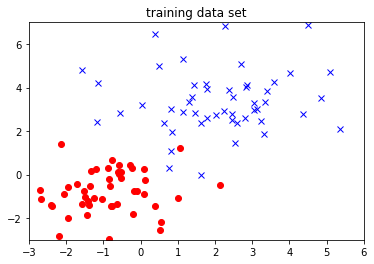

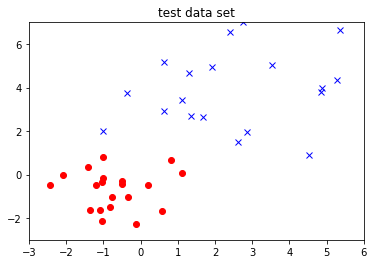

In [195]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

## <br>Results for Nonlinear Logistic Regression

### Results on toy data

In [248]:
clsf = NeuralNetLogReg([2, 5, 2])
clsf.train(Xtrain, Ttrain)
classes_toydata, Y_toydata = clsf.use(Xtest)

In [249]:
Y_toydata

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [250]:
classes_toydata

array([[0.51656045, 0.48343955],
       [0.5133401 , 0.4866599 ],
       [0.51641013, 0.48358987],
       [0.51655067, 0.48344933],
       [0.5257792 , 0.4742208 ],
       [0.52450822, 0.47549178],
       [0.51301956, 0.48698044],
       [0.50941609, 0.49058391],
       [0.51722058, 0.48277942],
       [0.51844134, 0.48155866],
       [0.52855884, 0.47144116],
       [0.52876069, 0.47123931],
       [0.51029345, 0.48970655],
       [0.51750551, 0.48249449],
       [0.52544249, 0.47455751],
       [0.5215341 , 0.4784659 ],
       [0.52440725, 0.47559275],
       [0.51970462, 0.48029538],
       [0.52109372, 0.47890628],
       [0.51733894, 0.48266106],
       [0.49664585, 0.50335415],
       [0.48419937, 0.51580063],
       [0.50447128, 0.49552872],
       [0.50269147, 0.49730853],
       [0.49673222, 0.50326778],
       [0.48566241, 0.51433759],
       [0.49591175, 0.50408825],
       [0.48355912, 0.51644088],
       [0.50264495, 0.49735505],
       [0.47406132, 0.52593868],
       [0.

In [251]:
print('Accuracy:', accuracy_score(Ttest,Y_toydata))

Accuracy: 0.925


Text(0.5, 1.0, 'plot for original toy data values')

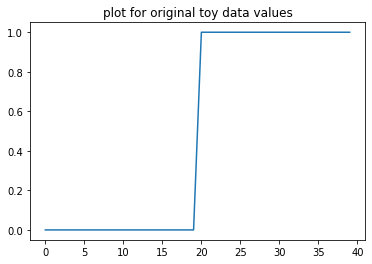

In [252]:
plt.plot(Ttest)
plt.title("plot for original toy data values")

Text(0.5, 1.0, 'plot for predicted toy data values')

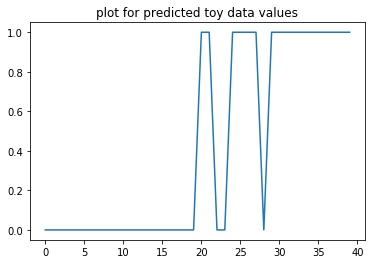

In [253]:
plt.plot(Y_toydata)
plt.title("plot for predicted toy data values")

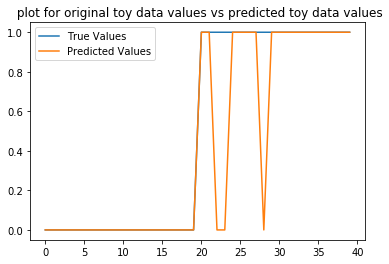

In [254]:
plt.plot(Ttest)
plt.plot(Y_toydata)
plt.title(" plot for original toy data values vs predicted toy data values")
plt.legend(['True Values','Predicted Values'])

###  Results on Classification data 

In [203]:
data1=data.iloc[:120000]

In [204]:
from sklearn import model_selection
t=pd.DataFrame(data1.iloc[:,-1])
df1_p=data1.drop(['Date','Location', 'WindDir9am', 'WindDir3pm','Cloud9am','Cloud3pm','Temp9am','WindGustSpeed','Humidity9am','Pressure9am','Temp3pm','WindGustDir','Evaporation','WindSpeed9am','WindSpeed3pm','RainToday','Sunshine','Rainfall','RainTomorrow'],axis=1)

xtrain,xtest,ytrain,ytest=model_selection.train_test_split(np.asarray(df1_p),np.asarray(t),test_size=0.30,random_state=42)


In [205]:
clsf = NeuralNetLogReg([5, 7, 2])
clsf.train(xtrain, ytrain)
classes_NLR, Y_NLR = clsf.use(xtest)

In [206]:
Y_NLR

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [207]:
classes_NLR

array([[0.57230094, 0.42769906],
       [0.57230094, 0.42769906],
       [0.57230094, 0.42769906],
       ...,
       [0.57230094, 0.42769906],
       [0.57230094, 0.42769906],
       [0.57230094, 0.42769906]])

In [208]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(ytest, Y_NLR)))
print('R squared value:', r2_score(ytest, Y_NLR))
print('Accuracy:', accuracy_score(ytest,Y_NLR))

RMSE: 0.48554093545240856
R squared value: -0.34248300274867316
Accuracy: 0.76425


### Visualization of Results 

Text(0.5, 1.0, 'Graph of Actual Values')

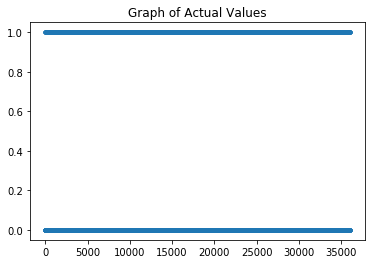

In [209]:
plt.plot(ytest,'.')
plt.title('Graph of Actual Values')

Text(0.5, 1.0, 'Graph of Predicted Values')

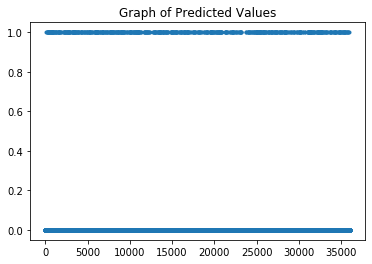

In [210]:
plt.plot(Y_NLR,'.')
plt.title('Graph of Predicted Values')

Text(0.5, 1.0, 'Graph of Predicted Values')

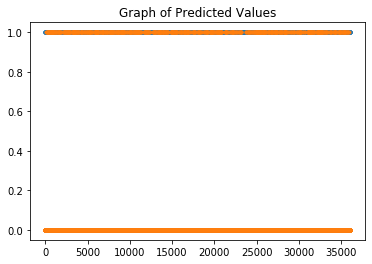

In [211]:
plt.plot(ytest,'.')
plt.plot(Y_NLR,'.')
plt.title('Graph of Predicted Values')

### Cross Validation

In [212]:
def split(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

final_list=[]
best_paramlist=[]
def cross_validation(X, T, parameters):
    X_NLR = split(X)
    Y_NLR = split(T)
    for test in range(5): 
        print("test",test)
        Xtest_NLR = X_NLR[test]
        Ytest_NLR = Y_NLR[test]
        j = 0
        
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval_NLR = X_NLR[val]
            Tval_NLR = Y_NLR[val]
            
            Xtrain_NLR = X_NLR[not test and not val]
            Ytrain_NLR = Y_NLR[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrain_NLR, Ytrain_NLR)
                prob,pred = model.use(Xval_NLR)
                Tval1=Tval_NLR[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrain = X_NLR[not test]
        Ttrain = Y_NLR[not test]
        bestModel.train(Xtrain, Ttrain)

        prob1,finalPred = bestModel.use(Xtest_NLR)
        Ttest1=Ytest_NLR[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        myf1 = f1_score(Ttest1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

### Explaination of Cross Validation Code:
The aim of cross validation id to find the best parameters and best accuracy for us given the different number of hidden layer values. The first function of this code is used to split our data in 5 equal parts (as we are implementing 5 fold cross validation), we iterate throught the lenght of the split data and keep on appending the data to the list so at the end of it we have 5 parts  of our data and then we return the list. The next function is cross validation function, this function is used to give us the best parameters and best accuracy. the funcion takes the inputs as the data set and the target values and then calls the split function so that it splits the data set in to 5 equal parts, these are storet in X and Y varidables. In the for loops we iterate multiple times using one part of the partitioned data as train set and rest as the test set.k is the validation part of the 5 parts. Excluding k and i the rest data is our training set. In each validation loop we are training data with our different parameters passed and evaluating on validation data. Each parameter returns rmse value and this is appended to rmselist, parameters respective to that rmse are appended into paramlist to keep track of indices. Now after each validation we are selecting the parameter that produced minimum rmse value and storing the results into history_rmse and params list. After all the iteration we choose the parameters that is repeated more number of times in best_paramlist from results.<br><br>

### Cross Validation results 

In [213]:
models = [[5,3,2],[5,5,2],[5,7,2], [5,10,2], [5,12,2]]

bestAccuracy,bestParam = cross_validation(xtrain, ytrain, models)

test 0
val 0
val 1
[0.8578013208585581, 0.13868562269147675, 0.000768521364893944, 0.04390747016354795, 0.0018434595591059224]
[[5, 3, 2], [5, 5, 2], [5, 7, 2], [5, 10, 2], [5, 12, 2]]
0.8578013208585581
[5, 3, 2]
val 2
[0.6363560662836206, 0.0, 0.1464438072592489, 0.8375833245159242, 0.1450066484708517]
[[5, 3, 2], [5, 5, 2], [5, 7, 2], [5, 10, 2], [5, 12, 2]]
0.8375833245159242
[5, 10, 2]
val 3
[0.15490033222591362, 0.8709503965586773, 0.0016911369052194632, 0.8658553076402975, 0.8720290049684436]
[[5, 3, 2], [5, 5, 2], [5, 7, 2], [5, 10, 2], [5, 12, 2]]
0.8720290049684436
[5, 12, 2]
val 4
[0.006579954093343535, 0.8406758360678628, 0.0781582227436029, 0.04962002682163612, 0.0]

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



[[5, 3, 2], [5, 5, 2], [5, 7, 2], [5, 10, 2], [5, 12, 2]]
0.8406758360678628
[5, 5, 2]
history_rmse [0.8578013208585581, 0.8375833245159242, 0.8720290049684436, 0.8406758360678628]
params [[5, 3, 2], [5, 10, 2], [5, 12, 2], [5, 5, 2]]
[0.8578013208585581, 0.8375833245159242, 0.8720290049684436, 0.8406758360678628]
[[5, 3, 2], [5, 10, 2], [5, 12, 2], [5, 5, 2]]
[5, 12, 2]
test 1
val 0
[0.841350504698921, 0.838882618510158, 0.8516700422230613, 0.1347663154917627, 0.866003787878788]
[[5, 3, 2], [5, 5, 2], [5, 7, 2], [5, 10, 2], [5, 12, 2]]
0.866003787878788
[5, 12, 2]
val 1
val 2
[0.8689697257348205, 0.8658380058096332, 0.0043193212495179325, 0.0001546551190844417, 0.025301021185794848]
[[5, 3, 2], [5, 5, 2], [5, 7, 2], [5, 10, 2], [5, 12, 2]]
0.8689697257348205
[5, 3, 2]
val 3
[0.8670586645039201, 0.00015397644160443453, 0.0, 0.8578575834418477, 0.004831647289747849]
[[5, 3, 2], [5, 5, 2], [5, 7, 2], [5, 10, 2], [5, 12, 2]]
0.8670586645039201
[5, 3, 2]
val 4
[0.0018450184501845018, 0.08

In [214]:
print(bestAccuracy,bestParam)

[0.0021638330757341576, 0.8493084537647019, 0.837633953750705, 0.8664501725187741, 0.8541595108882324] [[5, 12, 2], [5, 7, 2], [5, 10, 2], [5, 3, 2], [5, 5, 2]]


In [215]:
clsf = NeuralNetLogReg([5, 3, 2])
clsf.train(xtrain, ytrain)
classes_crossvalidated, Y_crossvalidated = clsf.use(xtest)

In [216]:
Y_crossvalidated

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [217]:
classes_crossvalidated

array([[0.50508697, 0.49491303],
       [0.50508697, 0.49491303],
       [0.50508697, 0.49491303],
       ...,
       [0.50508697, 0.49491303],
       [0.50508697, 0.49491303],
       [0.50508697, 0.49491303]])

In [218]:
print('RMSE:', np.sqrt(mean_squared_error(ytest, Y_crossvalidated)))
print('R squared value:', r2_score(ytest, Y_crossvalidated))
print('Accuracy:', accuracy_score(ytest,Y_crossvalidated))

RMSE: 0.47682398336399895
R squared value: -0.2947123102978544
Accuracy: 0.7726388888888889


###  Visualization of cross validation Results

Text(0.5, 1.0, 'Graph of Actual Values')

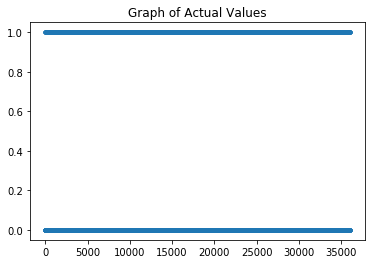

In [219]:
plt.plot(ytest,'.')
plt.title('Graph of Actual Values')

Text(0.5, 1.0, 'Graph of Predicted Values')

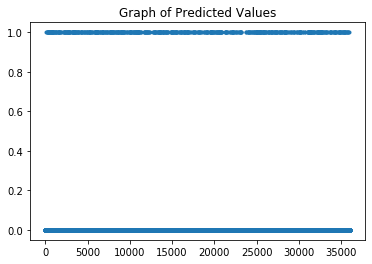

In [220]:
plt.plot(Y_NLR,'.')
plt.title('Graph of Predicted Values')

Text(0.5, 1.0, 'Graph of Predicted Values')

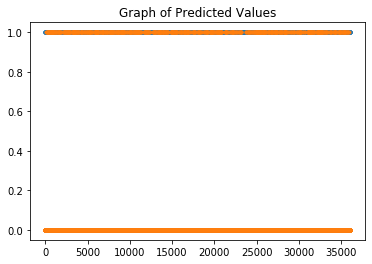

In [221]:
plt.plot(ytest,'.')
plt.plot(Y_NLR,'.')
plt.title('Graph of Predicted Values')

## Discussions about parameter/network structure choice
## Explanation of CV results<br><br>

Here i have built a 3 layer neural network with one input layer of 5 nodes, one hidden layer of 3 nodes and a output layer of 2 output node. I also have repeated this process by using different number of hidden nodes which gave us interesting results but out of which the neural network with 10 hiden units gave me the best results. <br>
I tried to find the best network structure using following structures [[5,3,2],[5,5,2],[5,7,2], [5,10,2], [5,12,2]] using 5 fold cross validation and the results i got were [0.8373682912217641, 0.13876106194690266, 0.8700420521446594, 0.15221459762944478, 0.14080178795921217] [[5, 5, 2], [5, 5, 2], [5, 3, 2], [5, 12, 2], [5, 12, 2]] respectively. here we can clearly see that the structure [5, 3, 2] has gives us the best results even though structure [5, 5, 2] has repeated more thimes it tends to over fit. we can also observe a significant change in the prediction before and after cross validation<br><br>

## Discussions about Prediction results<br><br>
Hrer I have implemented a class for NonLinear Logistic Regression Neural network with 5 input nodes, 7 hidden nodes, 2 output node, these 2 outputs are the prediction values and weights, we can also build the structure with nore hidden units and more hidden layers with a significant change in the code for updatation of weights. The RMSE value, the R squared value and accuracy score for the structure [5,7,2] are <br>RMSE: 0.48554093545240856
<br> squared value: -0.34248300274867316
<br>Accuracy: 0.76425
<br><br> we can observe that our network is working very well and giving us good values at this structure we have chosen 16 layers and have done 1000 iterations on this. But we fing better results after cross valodation where we get an optimum structure which is [5,3,2] and the RMSE value, the R squared value and accuracy score for the structure [5,3,2] are:<br> 
<br>RMSE: 0.47682398336399895
<br>R squared value: -0.2947123102978544
<br>Accuracy: 0.7726388888888889<br>

# Conclusions
In this assignment we have Written codes for different Neural Network problems like Nonlinear regression for regression data, Nonlinear Logistic Regression for Classification data. We have also evaluated our algorithms with help of different evaluation metrices like RMSE(Root Mean Squared error), R squared error and accuracy. With the help of these values we can understand and predict that how well are our Neural Networks classes working. After implementation of all the algorithms i have also performed 5 fold cross validation on these neural network classes to find a better structure which will give us better results and we can clearly observe this above. The hardest part in this assignment was to figure out the errors that came while implementing algorithms. We can say that, while implementing this assignment we get a fair and good idea about how these algorithms work and which one should we choose so that it works better while working with different kinds of data.


### References: 
[1] Goodfellow, Ian, et al. Deep Learning. MIT Press, 2016.<br>
[2] Young, Joe. “Rain in Australia.” Kaggle, 3 Dec. 2018, https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/metadata.<br>
[3] Prof.Minwoo J. Lee ,Class Notebooks (Class Notes)<br>
[4]AdityaDeshpande. “Amsterdam - AirBnb.” Kaggle, 5 Apr. 2019, https://www.kaggle.com/adityadeshpande23/amsterdam-airbnb/metadata.<br>

# Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function).  


### 1.Tanh

In [222]:
from grad import scg, steepest
from copy import copy


class NeuralNet:


    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [223]:

def split(data):
    part = len(data) / 5.0
    list = []
    x = 0.0
   
    while x < len(data):
        list.append(data[int(x):int(x + part)])
        x += part
    return list

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):

    X = split(X)
    Y = split(T)
 
    for i in range(5): 
        print("Test number: ",i)
        Xtest = X[i]
        Ytest = Y[i]

        history_rmse=[]
        params=[] 
        #best_param
        

        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
      
            Xval = X[k]
            Yval = Y[k]
            
            
            Xtrain = X[not i and not k]
            Ytrain = Y[not i and not k]
   
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(Xtrain, Ytrain)
                pred = model.use(Xval)
                
                valid_err = np.sqrt(mean_squared_error(Yval, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        Xtrain = X[not i]
        Ytrain = Y[not i]
        best_model.train(Xtrain, Ytrain)

        finalpred = best_model.use(Xtest)
        final_err = np.sqrt(mean_squared_error(Ytest, finalpred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist
    

In [224]:
models = [[16,10,1],[16,5,1],[16,2,1], [16,7,1], [16,12,1]]

bestAccuracy,bestParam = cross_validate(train_linaer, ytrain_linaer, models)

Test number:  0
K is :  0
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.139364949495075, 43.71986069746736, 43.332906318093904, 46.7905177494267, 48.78614791645497]
43.332906318093904
[16, 2, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.58855501437984, 46.55301664919954, 44.43856989578074, 45.07645013638331, 48.40080195565654]
44.43856989578074
[16, 2, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[49.82401513609724, 44.74913074486153, 43.84728370115372, 45.08099296317659, 48.22429278129309]
43.84728370115372
[16, 2, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.92764594327391, 44.21661541067689, 44.77375846186503, 45.322939555130255, 47.63173763128814]
44.21661541067689
[16, 5, 1]
[[16, 2, 1], [16, 2, 1], [16, 2, 1], [16, 5, 1]]
[43.332906318093904, 44.43856989578074, 43.84728370115372, 44.21661541067689]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  1
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[37.958626515898644, 39.97364026763756, 43.08572164650186, 39.305292443432855, 37.4006146871684]
37.4006146871684
[16, 12, 1]
K is :  1
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[49.744911945203896, 49.72011609655992, 44.43980869313282, 46.15388282191134, 48.07544295147593]
44.43980869313282
[16, 2, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[49.930518144228195, 44.94053862867711, 44.38323481476298, 46.12892327712649, 47.17614551999289]
44.38323481476298
[16, 2, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.97448141681912, 44.73106353095418, 44.75373726275294, 46.1442829659905, 48.815926294039784]
44.73106353095418
[16, 5, 1]
[[16, 12, 1], [16, 2, 1], [16, 2, 1], [16, 5, 1]]
[37.4006146871684, 44.43980869313282, 44.38323481476298, 44.73106353095418]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  2
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[38.113937015481596, 40.400898738722695, 43.07946903341218, 39.61694979379572, 37.38257111110393]
37.38257111110393
[16, 12, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.46952138808499, 43.42836025297098, 44.14080350640233, 44.705047628285065, 48.87299620315954]
43.42836025297098
[16, 5, 1]
K is :  2
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.421390241268014, 45.98303065508748, 44.30459531515347, 45.854712856857, 48.97062727446835]
44.30459531515347
[16, 2, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.767217566070734, 45.84084373781424, 44.73922020398496, 47.14974892448641, 48.00522792337303]
44.73922020398496
[16, 2, 1]
[[16, 12, 1], [16, 5, 1], [16, 2, 1], [16, 2, 1]]
[37.38257111110393, 43.42836025297098, 44.30459531515347, 44.73922020398496]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  3
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[37.906299661864544, 40.76506869203724, 43.07969922952915, 40.19910059406898, 36.93456876085645]
36.93456876085645
[16, 12, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.279977648000376, 44.23162828868759, 43.855219674483216, 45.89683620942821, 46.44675082752294]
43.855219674483216
[16, 2, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.54524420502517, 46.0186980824046, 44.437766375504964, 48.41425294126893, 47.245846050987154]
44.437766375504964
[16, 2, 1]
K is :  3
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[48.90965482272935, 45.31933084131751, 44.744171747176466, 46.56696910728535, 47.877665124239726]
44.744171747176466
[16, 2, 1]
[[16, 12, 1], [16, 2, 1], [16, 2, 1], [16, 2, 1]]
[36.93456876085645, 43.855219674483216, 44.437766375504964, 44.744171747176466]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  4
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[38.28810797174843, 39.959091323701294, 43.07960957303395, 39.54629575085551, 36.308162181372126]
36.308162181372126
[16, 12, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[45.05114325306046, 43.69074508418007, 43.45995974029549, 45.98822399696723, 47.971077637618905]
43.45995974029549
[16, 2, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.283721491766954, 45.462470139516846, 44.44433045900468, 46.04076065462947, 48.97385130861149]
44.44433045900468
[16, 2, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.933448995799125, 46.60181790343074, 43.88558555529311, 45.277286380407645, 49.43009797570943]
43.88558555529311
[16, 2, 1]
K is :  4
[[16, 12, 1], [16, 2, 1], [16, 2, 1], [16, 2, 1]]
[36.308162181372126, 43.45995974029549, 44.44433045900468, 43.88558555529311]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [225]:
print(bestAccuracy,bestParam)

[47.73935048236824, 45.82111844311003, 49.547635829063445, 48.675315766788145, 48.849710293393876] [[16, 10, 1], [16, 10, 1], [16, 10, 1], [16, 10, 1], [16, 10, 1]]


In [226]:
nn = NeuralNet([16,10,1])
nn.train(train_linaer, ytrain_linaer)
Y_NR_CV = nn.use(test_linaer)
Y_NR_CV

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


array([[ 99.90070418],
       [164.68119498],
       [168.47417264],
       ...,
       [112.39423194],
       [110.29245122],
       [122.61936289]])

In [227]:
print('RMSE:', np.sqrt(mean_squared_error(ytest_linaer, Y_NR_CV)))

RMSE: 43.298460258258245


### Sigmoid

In [228]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.Sigma(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (np.exp(-Z[i])/(1+np.exp(-Z[i]))**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [229]:

def split(data):
    part = len(data) / 5.0
    list = []
    x = 0.0
   
    while x < len(data):
        list.append(data[int(x):int(x + part)])
        x += part
    return list

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):

    X = split(X)
    Y = split(T)
 
    for i in range(5): 
        print("Test number: ",i)
        Xtest = X[i]
        Ytest = Y[i]

        history_rmse=[]
        params=[] 
        #best_param
        

        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
      
            Xval = X[k]
            Yval = Y[k]
            
            
            Xtrain = X[not i and not k]
            Ytrain = Y[not i and not k]
   
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(Xtrain, Ytrain)
                pred = model.use(Xval)
                
                valid_err = np.sqrt(mean_squared_error(Yval, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        Xtrain = X[not i]
        Ytrain = Y[not i]
        best_model.train(Xtrain, Ytrain)

        finalpred = best_model.use(Xtest)
        final_err = np.sqrt(mean_squared_error(Ytest, finalpred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist
    

In [230]:
models = [[16,10,1],[16,5,1],[16,2,1], [16,7,1], [16,12,1]]

bestAccuracy,bestParam = cross_validate(train_linaer, ytrain_linaer, models)

Test number:  0
K is :  0
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.17331901175766, 46.451178018674355, 47.92270865028843, 45.953943578468, 45.25516303485588]
45.25516303485588
[16, 12, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.97462748976838, 48.79830493117594, 50.63939241730694, 47.95717330906972, 49.168975928142956]
46.97462748976838
[16, 10, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[57.698420714055445, 46.63226858547176, 49.83395998877822, 47.58846089709537, 46.681728846235764]
46.63226858547176
[16, 5, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[49.31256638268995, 50.651046366767915, 51.05022462771157, 48.072575930545256, 47.16641789223]
47.16641789223
[16, 12, 1]
[[16, 12, 1], [16, 10, 1], [16, 5, 1], [16, 12, 1]]
[45.25516303485588, 46.97462748976838, 46.63226858547176, 47.16641789223]
[16, 10, 1]
Test number:  1
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.07686370986112, 47.70414183332624, 49.35825855865079, 46.64816266149813, 46.106339878468745]
46.106339878468745
[16, 12, 1]
K is :  1
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.870775402810004, 49.64458942888487, 50.73962085078927, 47.189168753487714, 48.55390554149493]
47.189168753487714
[16, 7, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.06686336660267, 47.92802663838081, 50.93295836006775, 46.23287555277015, 46.390520039838684]
46.23287555277015
[16, 7, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.61235834325431, 48.21596898685789, 56.829409871966675, 49.096721680651285, 47.28102337799389]
47.28102337799389
[16, 12, 1]
[[16, 12, 1], [16, 7, 1], [16, 7, 1], [16, 12, 1]]
[46.106339878468745, 47.189168753487714, 46.23287555277015, 47.28102337799389]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  2
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[61.68180590649171, 62.03659216881244, 48.50460081046106, 48.13408682612066, 46.208042144565304]
46.208042144565304
[16, 12, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.17669034992862, 45.88644015369549, 49.09569746870795, 45.70314217030157, 46.24732821498674]
45.70314217030157
[16, 7, 1]
K is :  2
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.46399215421857, 49.13156630076009, 60.12826749476663, 48.80034819610449, 45.97332886642847]
45.97332886642847
[16, 12, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[48.09196307672802, 48.803018377479404, 51.473900385972634, 48.23521915348597, 47.1766713334308]
47.1766713334308
[16, 12, 1]
[[16, 12, 1], [16, 7, 1], [16, 12, 1], [16, 12, 1]]
[46.208042144565304, 45.70314217030157, 45.97332886642847, 47.1766713334308]
[16, 5, 1]
Test number:  3
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.93950846739375, 48.15753982762628, 49.246589087061686, 47.77429167852151, 47.195976736825465]
46.93950846739375
[16, 10, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[45.27587590890323, 46.97059106875872, 49.29049525707896, 46.02507220281378, 45.93991860630657]
45.27587590890323
[16, 10, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.7745415451946, 46.860630696164236, 52.862952186964996, 48.27375689612092, 47.05804197172484]
46.860630696164236
[16, 5, 1]
K is :  3
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.766294688937705, 48.355330449692325, 50.70056923327331, 50.940072246077804, 48.045896277422756]
47.766294688937705
[16, 10, 1]
[[16, 10, 1], [16, 10, 1], [16, 5, 1], [16, 10, 1]]
[46.93950846739375, 45.27587590890323, 46.860630696164236, 47.766294688937705]
[16, 5, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  4
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.57542391568249, 47.9615406625203, 47.77365170245013, 47.04238329447303, 46.35489775595815]
46.35489775595815
[16, 12, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[45.68982447862526, 46.339836324670955, 49.48466752860409, 46.45014014461213, 45.08712337267879]
45.08712337267879
[16, 12, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.95901340065288, 48.474163903557624, 51.88054148835493, 47.995314948079745, 46.6546586133899]
46.6546586133899
[16, 12, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.13901562728612, 48.900308434999054, 50.11076339284071, 46.91029793034215, 46.283765102498975]
46.13901562728612
[16, 10, 1]
K is :  4
[[16, 12, 1], [16, 12, 1], [16, 12, 1], [16, 10, 1]]
[46.35489775595815, 45.08712337267879, 46.6546586133899, 46.13901562728612]
[16, 5, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [231]:
print(bestAccuracy,bestParam)

[46.77658735258886, 45.643866836622415, 48.91870879978156, 46.783868327850264, 49.03441643232412] [[16, 10, 1], [16, 10, 1], [16, 5, 1], [16, 5, 1], [16, 5, 1]]


In [232]:
nn = NeuralNet([16,5,1])
nn.train(train_linaer, ytrain_linaer)
Y_NR_CV = nn.use(test_linaer)
Y_NR_CV

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


array([[ 98.09033523],
       [136.54079802],
       [205.81048814],
       ...,
       [123.05954815],
       [123.88902691],
       [112.72045858]])

In [233]:
print('RMSE:', np.sqrt(mean_squared_error(ytest_linaer, Y_NR_CV)))

RMSE: 47.83872926695746


### ReLU

In [234]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
  

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)
    
    def ReLU(self, x):
        return x * (x > 0)

    def dReLU(self, x):
        return 1. * (x > 0)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.ReLU(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1. * Z[i])
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [235]:

def split(data):
    part = len(data) / 5.0
    list = []
    x = 0.0
   
    while x < len(data):
        list.append(data[int(x):int(x + part)])
        x += part
    return list

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):

    X = split(X)
    Y = split(T)
 
    for i in range(5): 
        print("Test number: ",i)
        Xtest = X[i]
        Ytest = Y[i]

        history_rmse=[]
        params=[] 
        #best_param
        

        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
      
            Xval = X[k]
            Yval = Y[k]
            
            
            Xtrain = X[not i and not k]
            Ytrain = Y[not i and not k]
   
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(Xtrain, Ytrain)
                pred = model.use(Xval)
                
                valid_err = np.sqrt(mean_squared_error(Yval, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        Xtrain = X[not i]
        Ytrain = Y[not i]
        best_model.train(Xtrain, Ytrain)

        finalpred = best_model.use(Xtest)
        final_err = np.sqrt(mean_squared_error(Ytest, finalpred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist
    

In [236]:
models = [[16,10,1],[16,5,1],[16,2,1], [16,7,1], [16,12,1]]

bestAccuracy,bestParam = cross_validate(train_linaer, ytrain_linaer, models)

Test number:  0
K is :  0
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.18286199467399, 45.636324057111594, 46.565560922396784, 44.89555292823627, 45.03869881000246]
44.89555292823627
[16, 7, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.853511509297476, 46.877780737659485, 48.32263529923171, 47.35150588918942, 45.779718311535966]
45.779718311535966
[16, 12, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[48.99425313467314, 46.42368553678806, 46.422246023030056, 46.438268030174655, 46.77823066661412]
46.422246023030056
[16, 2, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.320699603261204, 46.58239975603367, 49.26148331542253, 46.48518682565207, 46.745749008637475]
46.48518682565207
[16, 7, 1]
[[16, 7, 1], [16, 12, 1], [16, 2, 1], [16, 7, 1]]
[44.89555292823627, 45.779718311535966, 46.422246023030056, 46.48518682565207]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  1
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[45.315298468018376, 50.15927853203907, 47.27744350918935, 47.1680925239612, 43.987199001370804]
43.987199001370804
[16, 12, 1]
K is :  1
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.662536382807154, 48.08960820068435, 48.25615234140825, 46.106494134581105, 46.75291913349856]
46.106494134581105
[16, 7, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.39135019051149, 47.106668806089445, 47.17520595616541, 47.360850537849245, 46.26576915100477]
46.26576915100477
[16, 12, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.75442423500746, 47.12099749990016, 46.59308824264474, 49.96286830591767, 46.50413914066989]
46.50413914066989
[16, 12, 1]
[[16, 12, 1], [16, 7, 1], [16, 12, 1], [16, 12, 1]]
[43.987199001370804, 46.106494134581105, 46.26576915100477, 46.50413914066989]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  2
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[44.25117113515086, 46.42553064905621, 46.49431549041721, 44.220296557253775, 50.574629570814714]
44.220296557253775
[16, 7, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[45.404584271515205, 45.48965011149824, 45.740937594953394, 44.65614559478289, 45.27151076596347]
44.65614559478289
[16, 7, 1]
K is :  2
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.86945452417047, 46.78838096140307, 47.09753818874305, 45.63686725200489, 45.483107456773624]
45.483107456773624
[16, 12, 1]
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.95971043202212, 47.468594762053485, 47.02070995157598, 46.71462896939659, 46.213440186955786]
46.213440186955786
[16, 12, 1]
[[16, 7, 1], [16, 7, 1], [16, 12, 1], [16, 12, 1]]
[44.220296557253775, 44.65614559478289, 45.483107456773624, 46.213440186955786]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  3
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.64498232352002, 47.29734560826372, 48.58862591327658, 45.05922315473977, 45.313117557890564]
45.05922315473977
[16, 7, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.340561548983594, 45.57121120227533, 46.43297745835467, 46.621178529345705, 44.71396293606078]
44.71396293606078
[16, 12, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.96759570561666, 48.75525004259279, 53.00106104537057, 46.756395078489696, 46.178654515515994]
46.178654515515994
[16, 12, 1]
K is :  3
K is :  4


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.59663359657584, 47.573173193582384, 49.18330895290995, 47.77817691002936, 46.351766218081714]
46.351766218081714
[16, 12, 1]
[[16, 7, 1], [16, 12, 1], [16, 12, 1], [16, 12, 1]]
[45.05922315473977, 44.71396293606078, 46.178654515515994, 46.351766218081714]
[16, 5, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Test number:  4
K is :  0


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[49.25475588786847, 47.752780993645516, 49.24316430572866, 46.82832324546386, 44.624811806996384]
44.624811806996384
[16, 12, 1]
K is :  1


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[44.766608886601716, 46.389702140242505, 47.875793813302366, 45.43692603508171, 45.352455238841884]
44.766608886601716
[16, 10, 1]
K is :  2


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[47.45953369837278, 48.04683661544795, 48.434425021612405, 47.01348809135233, 48.96643560488711]
47.01348809135233
[16, 7, 1]
K is :  3


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a

[[16, 10, 1], [16, 5, 1], [16, 2, 1], [16, 7, 1], [16, 12, 1]]
[46.24523675479775, 45.54086095776971, 47.386974942754165, 46.82338919985088, 47.00091670746751]
45.54086095776971
[16, 5, 1]
K is :  4
[[16, 12, 1], [16, 10, 1], [16, 7, 1], [16, 5, 1]]
[44.624811806996384, 44.766608886601716, 47.01348809135233, 45.54086095776971]
[16, 10, 1]


C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [237]:
print(bestAccuracy,bestParam)

[46.12445643882737, 45.06695299837465, 46.97157423639174, 46.65630581424845, 45.76985867420151] [[16, 10, 1], [16, 10, 1], [16, 10, 1], [16, 5, 1], [16, 10, 1]]


In [238]:
nn = NeuralNet([16,10,1])
nn.train(train_linaer, ytrain_linaer)
Y_NR_CV = nn.use(test_linaer)
Y_NR_CV

C:\Users\ROHAN BHOSALE\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


array([[106.27658333],
       [147.06020888],
       [228.53988831],
       ...,
       [132.11437881],
       [128.19556016],
       [120.37322601]])

In [239]:
print('RMSE:', np.sqrt(mean_squared_error(ytest_linaer, Y_NR_CV)))

RMSE: 46.91576014819589


## Conclusion of Extra Credit:
Here we have tried 3 different activation functions which are Tanh, sigmoid, ReLU, and we have recorded RMSE values for these activation functions which are as follows:<br>
Tanh : 43.298460258258245
<br>sigmoid:RMSE: 47.83872926695746
<br>ReLU : 46.91576014819589